<div style="width: 400px; height: 160px;">
    <img src="rplogo_small.png" width="100%" height="100%" align="left">
</div>

###     TIPP - AAI Assignement (Machine Learning Fundamentals)<br>Due Date: 19 February 2020
###     Submitted By: <u>KOAY</u> SENG TIAN<br>Email: sengtian@yahoo.com


# Introduction
The [Pima](https://en.wikipedia.org/wiki/Pima_people) are a group of Native Americans living in Arizona. [Source](https://www.andreagrandi.it/2018/04/14/machine-learning-pima-indians-diabetes/) A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been the subject of many studies. 

This dataset was originally from the 'National Institute of Diabetes and Digestive and Kidney Diseases'.  The objective is to predict, based on diagnostic measurements whether a patient has diabetes.  Several constraints were placed on the selection of these instances from a larger database.  In particular, all patients here are females at least 21 years old of Pima Indian heritage.

__Data Source:__ [Kaggle](https://www.kaggle.com/kumargh/pimaindiansdiabetescsv)

# Data Understanding
The dataset includes data from 768 women with eight characteristics.   
- **Pregnancies:** Number of times pregnant
- **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure:** Diastolic blood pressure (mm Hg)
- **SkinThickness:** Triceps skin fold thickness (mm)
- **Insulin:** 2-Hour serum insulin (mu U/ml)
- **BMI:** Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction:** Diabetes pedigree function
- **Age:** Age (years)

The last column being the person was diagnosed with diabetes (1) or not (0).
- Outcome: Class variable (0 or 1)

In [1]:
# TIPP - AAI Assignment (Machine Learning Fundamentals)
# Date Due: 19 February 2020
# Submited By: KOAY SENG TIAN
# Email: sengtian@yahoo.com
#
# GitHub: https://github.com/koayst/rp_machinelearning_assignment
#
# load the modules/packages.
# If there is an error, need to install the modules/packages
# also list the version being used here
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle
import seaborn as sns
import sklearn

#pip install xgboost
import xgboost

import warnings

from platform import python_version

# show the versions of modules/packages imported
print('Version(s):\n')
print('python =', python_version())

print('mathplotlib =', matplotlib.__version__)
print('numpy =', np.__version__)
print('pandas =', pd.__version__)
print('pickel = ', pickle.format_version)
print('seaborn =', sns.__version__)
print('sklearn =', sklearn.__version__)
print('xgboost =', xgboost.__version__)

Version(s):

python = 3.7.6
mathplotlib = 3.0.3
numpy = 1.17.4
pandas = 1.0.1
pickel =  4.0
seaborn = 0.10.0
sklearn = 0.21.3
xgboost = 0.90


# Load Dataset

In [2]:
#the file is found in the same directory as this jupyter notebook
#another file, pima-indians-diabetes.names for reading reference
print('Load dataset.')

filedir = 'data'
filename='pima-indians-diabetes.csv'
filepath = os.path.join(os.getcwd(), filedir)

df = pd.read_csv(os.path.join(filepath, filename))

Load dataset.


In [3]:
print('Rows => {}\nColumns => {}'.format(df.shape[0], df.shape[1]))

Rows => 768
Columns => 9


In [4]:
df.head(5)
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Check the Dataset

In [6]:
#check for null - looks like there is none
print('Perform checks:\n')
print('Any NULL value in the dataset (True=there is Null)?')
print(df.isnull().values.any())

print('\n=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-')
print('Null values count in each feature:\n')
print(df.isnull().sum())

#check for any cell that is missing in dataframe - look like no missing cell
print('\n=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-')
print('Any cell is missing in table (True=there is missing cell)?')
print(df.isna().any().any())

Perform checks:

Any NULL value in the dataset (True=there is Null)?
False

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Null values count in each feature:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Any cell is missing in table (True=there is missing cell)?
False


In [7]:
print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-')
print('Check zero value cell in the able.')
df.eq(0).sum()

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Check zero value cell in the able.


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Replace Zero Values

In [8]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = \
df[['Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

# use the median to fill out the zero value cells
df.fillna(df.median(axis=0), inplace=True)
print('Zero value cell is replaced by its median.')

Zero value cell is replaced by its median.


In [9]:
print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-')
print('Check AGAIN for zero value cell.')
df.eq(0).sum()

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Check AGAIN for zero value cell.


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Data Description

In [10]:
descT = df.describe().transpose()
cols = list(descT)

#move 'max' column next to 'min' column for easier visual comparison
cols.insert(cols.index('25%'), cols.pop(cols.index('max')))
descT = descT.loc[:, cols]
descT

,count,mean,std,min,max,25%,50%,75%
Pregnancies,768.0,3.845052,3.369578,0.000,17.00,1.00000,3.0000,6.00000
Glucose,768.0,121.656250,30.438286,44.000,199.00,99.75000,117.0000,140.25000
BloodPressure,768.0,72.386719,12.096642,24.000,122.00,64.00000,72.0000,80.00000
SkinThickness,768.0,29.108073,8.791221,7.000,99.00,25.00000,29.0000,32.00000
Insulin,768.0,140.671875,86.383060,14.000,846.00,121.50000,125.0000,127.25000
BMI,768.0,32.455208,6.875177,18.200,67.10,27.50000,32.3000,36.60000
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,2.42,0.24375,0.3725,0.62625
Age,768.0,33.240885,11.760232,21.000,81.00,24.00000,29.0000,41.00000
Outcome,768.0,0.348958,0.476951,0.000,1.00,0.00000,0.0000,1.00000


# Dataset Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE602C4B48>,
      dtype=object)

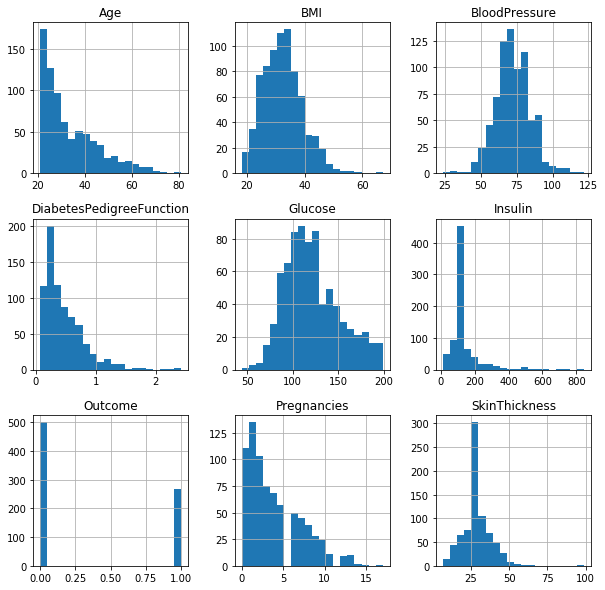

In [11]:
df.hist(bins=20, figsize=(10,10))

#looking at the 'pregnancies' histogram, there zero value
#This is reasonable as it is likely that a woman has never pregnant

# Class Imbalance

Class imbalance visualisation.


(0, 600)

Text(500, 0.0, '65.1%')

Text(268, 1.0, '34.9%')

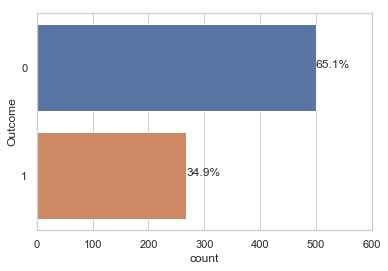

In [12]:
print('Class imbalance visualisation.')

#now show it as a horizontal bar chart using percentage
sns.set(style="whitegrid")

ax = sns.countplot(y="Outcome", data=df)
ax.set_xlim(0, 600)

total = len(df['Outcome'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
    
plt.show()

# Correlation Matrix

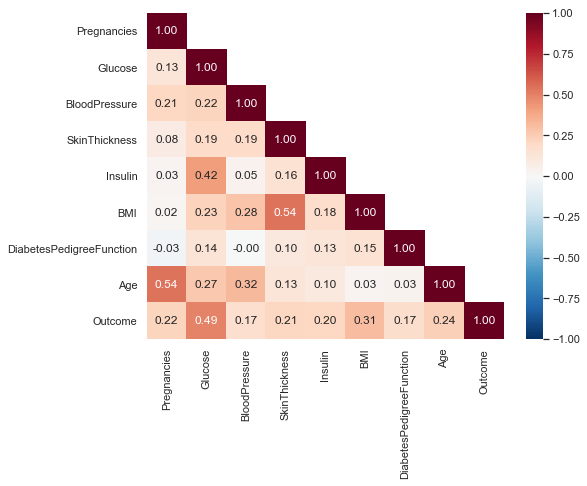

In [13]:
#plot the correlation as heatmap
corr = df.corr(method='pearson')

_, ax = plt.subplots(figsize=(8, 6))

mask = np.triu(corr, k=1)
sns.heatmap(corr, fmt=".2f", annot=True, vmin=-1, vmax=1, center= 0, cmap='RdBu_r', mask=mask, ax=ax)


In [14]:
corr.nlargest(9, 'Outcome').Outcome

# notice that order of feature importances are:

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

In [15]:
cname = ['Glucose', 'BMI', 'Age', 'Pregnancies'] 
#cname = df.columns[:-1]

X = df[cname].values
y = df.iloc[:, 8:].values
y = np.squeeze(y)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=df.Outcome)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(514, 4)
(514,)
(254, 4)
(254,)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
type(X_train)
type(X_test)
X_train.shape
X_test.shape

numpy.ndarray

numpy.ndarray

(514, 4)

(254, 4)

# Model Selection

In [19]:
from sklearn import model_selection

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

rowsList=[]

print('Perform preliminary model selection:')

for model in [
    DummyClassifier,
    GaussianNB,
    KNeighborsClassifier,
    LogisticRegression,
    RandomForestClassifier,
    SVC,
    XGBClassifier]:
    
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    classifier = model()
    result = model_selection.cross_val_score(classifier, X_train, y_train, scoring='roc_auc', cv=kfold)
    dict = {'Classifier': model.__name__, 'ROC_AUC': result.mean(), 'STD': result.std()}
    rowsList.append(dict)

dfModelRanking = pd.DataFrame(rowsList)
dfModelRanking.sort_values(by='ROC_AUC', ascending=False).style.hide_index()

Perform preliminary model selection:


Classifier,ROC_AUC,STD
LogisticRegression,0.833168,0.049642
GaussianNB,0.832539,0.043438
SVC,0.823197,0.042369
XGBClassifier,0.821290,0.043879
KNeighborsClassifier,0.792719,0.031218
RandomForestClassifier,0.790302,0.037403
DummyClassifier,0.510763,0.085026


# Model Evaluation

In [20]:
#narrow down the model selection to top 3 for evaluation
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix

print('Models are now narrowed to three:')

clf_list = [
    XGBClassifier,
    LogisticRegression,
    GaussianNB]

def iterateAndTestModelAccuracy(classifier_testList=DummyClassifier):
    for model in classifier_testList: 
        np.random.seed(42)
        clf = model()
        clf.fit(X_train, y_train)
        predict = clf.predict(X_test)
        accu = roc_auc_score(y_test, predict)
        cm = confusion_matrix(y_test, predict)
        print('\n-=-=-={}-=-=-='.format(model.__name__))
        print('ROC AUC = {}%\n'.format(round(accu*100, 2)))
        print(pd.crosstab(y_test, predict, rownames=['True'], colnames=['Predicted'], margins=True))

iterateAndTestModelAccuracy(clf_list)

Models are now narrowed to three:

-=-=-=XGBClassifier-=-=-=
ROC AUC = 72.72%

Predicted    0   1  All
True                   
0          138  27  165
1           34  55   89
All        172  82  254

-=-=-=LogisticRegression-=-=-=
ROC AUC = 70.21%

Predicted    0   1  All
True                   
0          139  26  165
1           39  50   89
All        178  76  254

-=-=-=GaussianNB-=-=-=
ROC AUC = 69.35%

Predicted    0   1  All
True                   
0          138  27  165
1           40  49   89
All        178  76  254


In [21]:
from sklearn.model_selection import GridSearchCV

def findModelBestParams(classifier, gParams):
    model = classifier()
    gs = GridSearchCV(estimator=model, 
                  param_grid=gParams, 
                  scoring='roc_auc',
                  cv=10,
                  n_jobs=-1)
    gs.fit(X_train, y_train)
    print('-=-=-={}-=-=-=-'.format(classifier.__name__))
    print('Best parameters => {}'.format(gs.best_params_))
    print('Best score => {}'.format(gs.best_score_))
    return gs.best_params_


In [22]:
#Find best parameters XGBoost

In [23]:
gridParams= {
    'max_depth': [2],
    'min_child_weight': [1],
    'gamma': [0],
    'subsample': [0.8],
    'colsample_bytree' : [0.6],
    'verbosity' : [0]
}

print('Find best paramters for XGBoost.')
xgb_bestParams = findModelBestParams(XGBClassifier, gridParams)

Find best paramters for XGBoost.
-=-=-=XGBClassifier-=-=-=-
Best parameters => {'colsample_bytree': 0.6, 'gamma': 0, 'max_depth': 2, 'min_child_weight': 1, 'subsample': 0.8, 'verbosity': 0}
Best score => 0.8373128168848013


In [24]:
xgb_classifier = XGBClassifier (**xgb_bestParams)
xgb_classifier.fit(X_train, y_train)
xgb_predict = xgb_classifier.predict(X_test)

xgb_rocauc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:,1])
cm = confusion_matrix(y_test, xgb_predict)
print('-=-=-=XGBoost-=-=-=')
print('ROC AUC = {}%\n'.format(round(xgb_rocauc * 100, 2)))
pd.crosstab(y_test, xgb_predict, rownames=['True'], colnames=['Predicted'], margins=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=0)

-=-=-=XGBoost-=-=-=
ROC AUC = 83.46%



Predicted,0,1,All
True,,,
0,138,27,165
1,40,49,89
All,178,76,254


In [25]:
#Find best parameters LogisticRegression

In [26]:
gridParams= {
    'penalty' : ['l1', 'l2'],
    'random_state' : [42]
}

print('Find best paramters for LogisticRegression.')
lr_bestParams = findModelBestParams(LogisticRegression, gridParams)

Find best paramters for LogisticRegression.
-=-=-=LogisticRegression-=-=-=-
Best parameters => {'penalty': 'l2', 'random_state': 42}
Best score => 0.8333529851039578


In [27]:
lr_classifier = LogisticRegression(**lr_bestParams)
lr_classifier.fit(X_train, y_train)
lr_predict = lr_classifier.predict(X_test)

lr_auc = roc_auc_score(y_test, lr_classifier.predict_proba(X_test)[:,1])
cm = confusion_matrix(y_test, lr_predict)
print('-=-=-=LogisticRegression-=-=-=')
print('ROC AUC = {}%'.format(round(lr_auc * 100, 2)))
pd.crosstab(y_test, lr_predict, rownames=['True'], colnames=['Predicted'], margins=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

-=-=-=LogisticRegression-=-=-=
ROC AUC = 82.68%


Predicted,0,1,All
True,,,
0,139,26,165
1,39,50,89
All,178,76,254


In [28]:
#Find best parameters GaussianNB

In [29]:
gridParams= {
}

print('Find best paramters for GaussianNB.')
gnb_bestParams = findModelBestParams(GaussianNB, gridParams)

Find best paramters for GaussianNB.
-=-=-=GaussianNB-=-=-=-
Best parameters => {}
Best score => 0.8302381794599694


In [30]:
gnb_classifier = GaussianNB (**gnb_bestParams)
gnb_classifier.fit(X_train, y_train)
gnb_predict = gnb_classifier.predict(X_test)

gnb_auc = roc_auc_score(y_test, gnb_classifier.predict_proba(X_test)[:,1])
cm = confusion_matrix(y_test, gnb_predict)
print('-=-=-=GaussianNB-=-=-=')
print('ROC AUC = {}%'.format(round(gnb_auc * 100, 2)))
pd.crosstab(y_test, gnb_predict, rownames=['True'], colnames=['Predicted'], margins=True)


GaussianNB(priors=None, var_smoothing=1e-09)

-=-=-=GaussianNB-=-=-=
ROC AUC = 82.24%


Predicted,0,1,All
True,,,
0,138,27,165
1,40,49,89
All,178,76,254


In [31]:
#XGBoost is the winner
print ('Using XGBoost as a model to classify the dataset.')

Using XGBoost as a model to classify the dataset.


In [32]:
from sklearn.metrics import classification_report

print('--- Metrices ---\n')
print('XGBoost:')
print(classification_report(y_true=y_test, y_pred=xgb_predict))
print('-------------------------------------------------------')
print('Logistic Regression:')
print(classification_report(y_true=y_test, y_pred=lr_predict))
print('-------------------------------------------------------')
print('GaussianNB:')
print(classification_report(y_true=y_test, y_pred=gnb_predict))

--- Metrices ---

XGBoost:
              precision    recall  f1-score   support

           0       0.78      0.84      0.80       165
           1       0.64      0.55      0.59        89

    accuracy                           0.74       254
   macro avg       0.71      0.69      0.70       254
weighted avg       0.73      0.74      0.73       254

-------------------------------------------------------
Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       165
           1       0.66      0.56      0.61        89

    accuracy                           0.74       254
   macro avg       0.72      0.70      0.71       254
weighted avg       0.74      0.74      0.74       254

-------------------------------------------------------
GaussianNB:
              precision    recall  f1-score   support

           0       0.78      0.84      0.80       165
           1       0.64      0.55      0.59        89

    accura

0.8346271705822268
0.826762002042901
0.8224038134150494


<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC)')

Text(0.5, 0, 'False Positive Rate (FPR)')

Text(0, 0.5, 'True Positive Rate (TPR)')

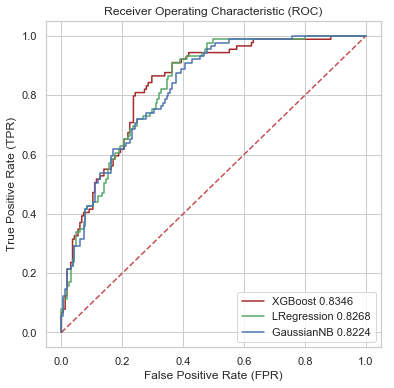

In [33]:
xgb_probs = xgb_classifier.predict_proba(X_test)
xgb_preds = xgb_probs[:,1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_preds)
xgb_rocauc = auc(xgb_fpr, xgb_tpr)
print(xgb_rocauc)

lr_probs = lr_classifier.predict_proba(X_test)
lr_preds = lr_probs[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_preds)
lr_rocauc = auc(lr_fpr, lr_tpr)
print(lr_rocauc)

gnb_probs = gnb_classifier.predict_proba(X_test)
gnb_preds = gnb_probs[:,1]
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_preds)
gnb_rocauc = auc(gnb_fpr, gnb_tpr)
print(gnb_rocauc)

plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(xgb_fpr, xgb_tpr, 'brown', label='XGBoost %.4f' % xgb_rocauc)
plt.plot(lr_fpr, lr_tpr, 'g-', label='LRegression %.4f' % lr_rocauc)
plt.plot(gnb_fpr, gnb_tpr, 'b-', label='GaussianNB %.4f' % gnb_rocauc)

plt.legend()
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()


Below show which features are important in the prediction.


[Text(0, 0, 'Glucose'),
 Text(0, 0, 'BMI'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'Pregnancies')]

Text(0.5, 1.0, 'xgboost.plot_importance(model)')

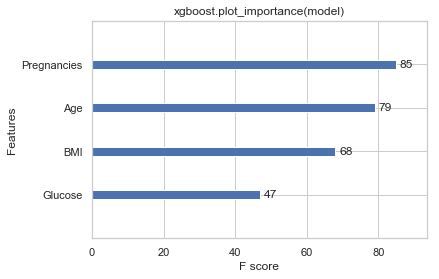

In [34]:
print("Below show which features are important in the prediction.")
xgboost.plot_importance(xgb_classifier).set_yticklabels(cname)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [35]:
#let save the model using pickle

In [36]:
print('Save model.')
model_filename = 'pima-indians-xgboost.pkl'
filedir = os.path.join(os.getcwd(), 'model')
filepath = os.path.join(filedir, model_filename)
pickle.dump (xgb_classifier, open(filepath, 'wb'))
print(filepath)

print('\nSave scaler.')
scaler_filename = 'pima-indians-scaler.pkl'
filedir = os.path.join(os.getcwd(), 'model')
filepath = os.path.join(filedir, scaler_filename)
pickle.dump (scaler, open(filepath, 'wb'))
print(filepath)


Save model.
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Assignment_MachineLearningFundamental\TIPPAAI_ML_Fundamentals_Koay_Seng_Tian\model\pima-indians-xgboost.pkl

Save scaler.
C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Assignment_MachineLearningFundamental\TIPPAAI_ML_Fundamentals_Koay_Seng_Tian\model\pima-indians-scaler.pkl


In [37]:
#load the model for testing

In [38]:
from sklearn.externals import joblib

print('Load model.')
model_filename='pima-indians-xgboost.pkl'
filedir=os.path.join(os.getcwd(), 'model')
filepath = os.path.join(filedir, model_filename)
loaded_model = pickle.load (open(filepath, 'rb'))

print('Load scaler.')
scaler_filename = 'pima-indians-scaler.pkl'
filedir = os.path.join(os.getcwd(), 'model')
filepath = os.path.join(filedir, scaler_filename)
loaded_scaler = pickle.load(open(filepath, 'rb'))


Load model.
Load scaler.


In [39]:
#let's test

In [40]:
#cn = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# testData = [
#     [6, 148, 72, 35, 0, 33.6, 0.627, 50],
#     [93, 70, 31, 23, 0, 30.4, 0.315, 23]
# ]

#cn=['Glucose', 'BMI', 'Age', 'Pregnancies']
testData = [
    [93, 30.4, 23, 1],
    [148, 33.6, 50, 6]
]

testData = loaded_scaler.transform(testData)
testData

array([[-0.93663504, -0.33330474, -0.89264688, -0.86044341],
       [ 0.89074057,  0.13942065,  1.44209745,  0.62567189]])

In [41]:
def DiabetesLikelihood(xdf):

    prediction = loaded_model.predict(xdf)
#     print('\n-=-=-=Prediction=-=-=-=-=-')
#     print(x.transpose())
#     print('-=-=-=-=-=-=-=-=-=-=-=-=-=')

    prediction
    if prediction[0] == 1:
        print('Diabetes risk is High')
    else:
        print('Diabetes risk is Low')
    confidence = loaded_model.predict_proba(xdf)
    print(confidence)
    print('Confidence: ' + str(round(confidence[0][prediction[0]] * 100, 2)) + "%")
        

In [42]:
testData[0]
DiabetesLikelihood([testData[0]])

array([-0.93663504, -0.33330474, -0.89264688, -0.86044341])

Diabetes risk is Low
[[0.9371199 0.0628801]]
Confidence: 93.71%


In [43]:
testData[1]
DiabetesLikelihood([testData[1]])

array([0.89074057, 0.13942065, 1.44209745, 0.62567189])

Diabetes risk is High
[[0.3397085 0.6602915]]
Confidence: 66.03%
